In [26]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.common import *
from config.config import *

c:\Users\Admin\Data\ads_fraud_detection


# 3. Tiền xử lí dữ liệu

In [27]:
save_dir=f"{exps_dir}/exp1/exp_gan"

save_dir = f"{save_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [28]:
test_size=0.33
seed=42
data=pd.read_excel(f'{exps_dir}/exp1/data_EDA.xlsx')
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
0,Y,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,Morning,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2002-2008,Y,17,10,2014,25,1,2015
1,Y,Middle,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,Morning,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2002-2008,Y,27,6,2006,21,1,2015
2,Y,Young,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,Morning,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2002-2008,N,6,9,2000,22,2,2015
3,Y,Middle,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,Morning,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2018++,Y,25,5,1990,10,1,2015
4,Y,Middle,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,Night,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2018++,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,N,Middle,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,Night,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2002-2008,N,16,7,1991,22,2,2015
996,Y,Middle,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,Night,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2018++,N,5,1,2014,24,1,2015
997,Y,Young,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,Morning,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1995-20001,N,17,2,2003,23,1,2015
998,Y,Old,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,Morning,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1995-20001,N,18,11,2011,26,2,2015


In [29]:
data.isnull().sum()

months_as_customer              4
age                             2
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_hour_of_the_day       52
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim 

# 4.Chuẩn hóa dữ liệu

In [30]:
numeric_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
numeric_columns

array(['policy_annual_premium', 'capital-gains', 'capital-loss',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'day_policy_bind_date', 'month_policy_bind_date',
       'year_policy_bind_date', 'day_incident_date',
       'month_incident_date', 'year_incident_date'], dtype='<U22')

In [31]:
category_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
category_columns

array(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported'],
      dtype='<U27')

In [32]:
data_train, data_test = train_test_split(data, test_size = 0.33, random_state=seed)
print(data_train.shape,data_test.shape)
# data_train.to_excel(f'{save_dir}/datatrain.xlsx', index=None)
# data_test.to_excel(f'{save_dir}/datatest.xlsx', index=None)

(670, 40) (330, 40)


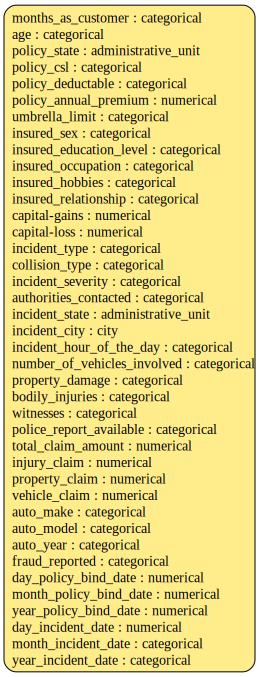

In [33]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data_train)
metadata.visualize()

In [34]:
from sdv.single_table import CopulaGANSynthesizer
model = CopulaGANSynthesizer(
    cuda=True, metadata=metadata, epochs=100)
#     anonymize_fields={
#    'address': 'address',
#    'city': 'incident_city',

#     }

model.fit(data)

In [35]:
new_data = model.sample(num_rows=200)

In [36]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 40/40 [00:00<00:00, 3077.09it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 500.10it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [37]:
from sdv.evaluation.single_table import evaluate_quality

quality_report=evaluate_quality(real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 3076.30it/s]|
Column Shapes Score: 83.63%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:02<00:00, 334.35it/s]|
Column Pair Trends Score: 72.71%

Overall Score (Average): 78.17%



In [38]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,months_as_customer,TVComplement,0.984017
1,age,TVComplement,0.843716
2,policy_csl,TVComplement,0.954104
3,policy_deductable,TVComplement,0.939925
4,policy_annual_premium,KSComplement,0.463209
5,umbrella_limit,TVComplement,0.945597
6,insured_sex,TVComplement,0.940373
7,insured_education_level,TVComplement,0.925299
8,insured_occupation,TVComplement,0.866418
9,insured_hobbies,TVComplement,0.811343


In [39]:
from sklearn.utils import shuffle
gan_data_fraud=new_data[new_data.fraud_reported=="Y"]
data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)

data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)
data_train = shuffle(data_train, random_state=42)
data_train.fraud_reported.value_counts()



fraud_reported
N    511
Y    293
Name: count, dtype: int64

In [40]:
data_train.fraud_reported.tail

<bound method NDFrame.tail of 192    N
717    Y
168    N
522    N
536    Y
      ..
71     N
106    N
270    N
435    N
102    N
Name: fraud_reported, Length: 804, dtype: object>

In [41]:
x_train=data_train.drop('fraud_reported',axis=1)
y_train=data_train['fraud_reported']

# x_test=data_test.drop('fraud_reported',axis=1)
# y_test=data_test['fraud_reported']

In [42]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict

{0: 0.786692759295499, 1: 1.372013651877133}

In [43]:
y_train.value_counts()

fraud_reported
N    511
Y    293
Name: count, dtype: int64

In [44]:
x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']

In [45]:
label_encoders = {}
for column in category_columns:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_train[column] = label_encoder.fit_transform(x_train[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
192,1,0,9,2,1,0.692104,0,0,5,7,9,0,1.684541,0.923356,0,3,1,2,22,47,0,2,2,0,2,2,1.187848,0.248002,0.008517,1.432985,9,29,1,0.946257,-1.494313,0.087214,-0.293388,0.997739,0.0
717,1,3,29,1,0,0.420581,0,0,0,10,7,5,-0.842845,0.923356,3,2,1,2,26,6,2,0,2,1,0,0,-0.126204,0.036109,0.440044,0.389260,11,19,2,-0.257179,-1.211890,1.559204,-1.076311,-0.903167,0.0
168,1,0,10,0,0,-1.125076,0,0,3,3,16,1,1.038884,-1.520300,2,1,2,1,22,55,2,0,0,1,0,0,0.918425,1.645634,-0.121349,0.744331,6,8,2,-1.241809,-0.082198,0.890118,-0.181541,0.997739,0.0
522,1,0,31,1,0,-0.204070,0,1,0,10,15,3,-0.842845,-0.730603,2,2,0,3,35,47,1,0,1,2,2,2,0.002387,0.673013,-0.562894,-0.128803,4,27,2,1.274467,-0.929467,-1.652410,-1.411849,2.898645,0.0
536,1,1,9,1,0,-0.268281,0,1,4,3,8,1,-0.842845,-0.666207,2,1,0,3,22,4,0,0,0,0,0,0,0.463485,-0.254655,-0.447870,0.704500,8,24,0,1.055660,-0.647044,1.291570,-0.069695,-0.903167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,9,1,1,0.929477,0,0,1,10,8,2,-0.842845,0.923356,0,3,0,0,38,60,2,2,0,0,0,0,-0.497584,-0.718489,-0.869008,-0.366216,13,28,1,1.712080,0.200225,-1.384776,-0.852618,-0.903167,0.0
106,0,2,10,1,0,0.153615,3,0,5,12,8,0,0.921492,0.923356,2,3,2,3,38,60,0,0,2,2,3,1,1.517698,1.943959,1.548360,1.012141,0,31,2,-1.132406,-1.494313,0.890118,0.377690,-0.903167,0.0
270,1,2,10,2,0,-2.041927,5,1,2,6,15,4,1.004357,0.923356,2,3,2,3,40,46,1,0,1,0,2,2,1.013877,1.457648,-0.206690,0.946630,11,21,2,0.071030,1.329917,0.221032,-0.852618,-0.903167,0.0
435,1,0,9,2,2,0.741066,0,1,5,11,8,2,0.462281,0.923356,2,1,1,1,35,18,1,0,1,0,3,0,0.487348,0.750659,0.464904,0.221289,5,14,1,1.493273,-0.929467,-1.652410,0.713228,-0.903167,0.0


In [58]:
y_train = label_encoder.fit_transform(y_train)
y_train=pd.DataFrame(y_train,columns=['fraud_reported'])

In [59]:
x_train.to_excel(f'{save_dir}/x_train.xlsx', index=False)
y_train.to_excel(f'{save_dir}/y_train.xlsx', index=False)

In [47]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict


{0: 0.786692759295499, 1: 1.372013651877133}

In [48]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"+ X_train: {len(x_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 804
Fold 0: 
+ train_idx: [  0   1   3   4   5   6   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  32  34  35  36  37  38  40  41  42  43  44
  45  46  47  48  50  51  52  53  55  56  57  58  59  60  61  62  64  68
  69  70  71  73  74  75  79  80  82  83  85  87  88  89  90  91  92  93
  94  95  98  99 100 102 103 104 105 106 107 108 111 112 113 114 115 116
 117 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 138 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 156 157
 158 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197
 200 201 202 203 204 205 206 207 214 216 217 219 220 221 222 223 224 225
 226 228 229 230 232 233 234 236 237 238 240 241 242 243 244 245 246 247
 248 249 251 252 253 255 256 257 258 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 282 283 284 285 286 287
 288 289 290 2

In [56]:
object_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
numeric_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
# for column in outliers_list:
#     data_test = remove_outliers_iqr(data_test, column)
# data_test['collision_type'].replace('?',np.nan,inplace=True)
# data_test['collision_type'].fillna(method='ffill',inplace=True)
# data_test[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
# (data_test=='?').sum()
label_encoders = {}
for column in object_cols_test:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_test[column] = label_encoder.fit_transform(x_test[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_test[numeric_cols_test] = scaler.fit_transform(x_test[numeric_cols_test])
y_test = label_encoder.fit_transform(y_test)
y_test=pd.DataFrame(y_test,columns=['fraud_reported'])
data_test.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)
x_test.to_excel(f'{save_dir}/x_test.xlsx', index=False)
y_test.to_excel(f'{save_dir}/y_test.xlsx', index=False)

In [57]:
y_test

,fraud_reported
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0
